In [2]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# After this process, the 'k'th subject's data will be pasted on study(or test)_list['k'] 

study_list = [None]
test_list = [None]

for i in range(31):
    if i <= 8:
        study_list.append(pd.read_csv('./DMdata/DM0{}/DM0{}_study.txt'.format(i+1,i+1), sep = "\t", engine='python', index_col = False))
        test_list.append(pd.read_csv('./DMdata/DM0{}/DM0{}_test.txt'.format(i+1,i+1), sep = "\t", engine='python', index_col = False))
    else :
        study_list.append(pd.read_csv('./DMdata/DM{}/DM{}_study.txt'.format(i+1,i+1), sep = "\t", engine='python', index_col = False))
        test_list.append(pd.read_csv('./DMdata/DM{}/DM{}_test.txt'.format(i+1,i+1), sep = "\t", engine='python', index_col = False))


# Display the 2nd subject's study data

display(study_list[2])

# Print the 17th subject's test data

print(test_list[17])

,Trial,ObjID,LocID,FB,Task,RT,Stim
0,1,44,3,1,-2,1500,4015
1,2,126,1,1,-2,1500,10027
2,3,185,2,1,-2,1283,16025
3,4,86,4,1,-2,632,24023
4,5,137,2,1,-2,965,32021
...,...,...,...,...,...,...,...
259,260,199,4,1,-1,616,695931
260,261,250,3,1,-1,1015,701930
261,262,4,2,1,-1,615,709928
262,263,128,4,1,-1,750,715925


     Trial  Object_ID  Task_Type  Stim_onset1   RT1  Res1  Stim_onset2   RT2  \
0        1        213          0         1006  2224     1         4966   565   
1        2        236          1         6664   761     4            0     0   
2        3         35          0        10176   329     1        12240   365   
3        4        217          0        13621   828     1        16185  1630   
4        5        128          0        18948   795     1        21478   514   
..     ...        ...        ...          ...   ...   ...          ...   ...   
523    524        146          0      1780321   245     1      1782302   182   
524    525        189          1      1783617   395     4            0     0   
525    526         10          1      1786763   612     4            0     0   
526    527        160          1      1790125   528     4            0     0   
527    528        170          1      1793404   312     4            0     0   

     Res2  
0       4  
1       0  
2  

In [4]:
# Add a column whose name is "Res_Type"
conditions = []

values = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']
for h in range(31):
    conditions.append([(test_list[h+1]['Task_Type']==a) & (test_list[h+1]['Res1']==b) for a in range(2) for b in range(1,5)])

    
for i in range(31):
    test_list[i+1]["Res_Type"]= np.select(conditions[i], values)

In [5]:
# Check whether the prior code properly worked by comparing 264rows vs 264rows

X = test_list[2][test_list[2]['Task_Type']==0]
Y = test_list[2][test_list[2]['Res_Type'].isin(values[:4])]

len(X) == len(Y)

True

In [6]:
# Memory Score data of each subject
# After this process, every subject's response rate data will be pasted on MScores. 

HitnMiss = values[:4]
CRnFA = values[4:]
ResRates = [None]

for k in range(1,32):
    old = test_list[k][test_list[k]['Res_Type'].isin(HitnMiss)]['Res_Type'].value_counts(normalize=True)
    new = test_list[k][test_list[k]['Res_Type'].isin(CRnFA)]['Res_Type'].value_counts(normalize=True)
    df = pd.concat([old,new], axis = 0)
    X = pd.Series(df, name="Response rate").to_frame()
    X.index.name = 'Res Type'
    Y = X.reindex(index=values)
    Z = Y.reset_index()
    Z["Task Type"] = Z["Res Type"].isin(HitnMiss)
    Z['Task Type'] = Z['Task Type'].replace([True, False],['Old','New'])
    ResRates.append(Z)

# Just check

print(ResRates[1])
    

  Res Type  Response rate Task Type
0   HIT-HC       0.670455       Old
1   HIT-LC       0.140152       Old
2  MISS-LC       0.106061       Old
3  MISS-HC       0.083333       Old
4    FA-HC       0.030303       New
5    FA-LC       0.094697       New
6    CR-LC       0.344697       New
7    CR-HC       0.530303       New


Define some functions

,Res Type,Response rate,Task Type
0,HIT-HC,0.299242,Old
1,HIT-LC,0.280303,Old
2,MISS-LC,0.181818,Old
3,MISS-HC,0.238636,Old
4,FA-HC,0.034091,New
5,FA-LC,0.155303,New
6,CR-LC,0.321970,New
7,CR-HC,0.488636,New


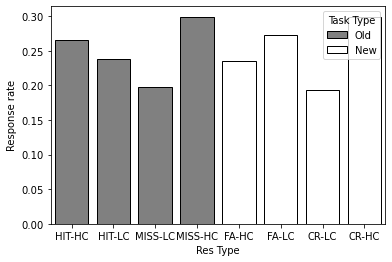

In [7]:
# A function shows you his memory score table when you input the subject's id

def subject_ResRates(id):
    return ResRates[id]


# A function shows you his memory score table when you input the subject's id

def subject_ResRates_bar(id):
    palette ={"Old": "gray", "New": "white"}
    ax = sns.barplot(x="Res Type", y="Response rate", hue="Task Type", data=ResRates[id], palette = palette, dodge=False, edgecolor='k')    
    
    
    
display(subject_ResRates(7))    

subject_ResRates_bar(21)
    

Memory Scores

-plotting the mean and std of entire subject data

In [8]:
# All the necessary data of every subject including 'Task Type' column will be pasted on 'Bulk'

tmp = [subject_ResRates(i) for i in range(1,32)]
Bulk = pd.concat(tmp)
Bulk["Task Type"] = Bulk["Res Type"].isin(HitnMiss)
Bulk['Task Type'] = Bulk['Task Type'].replace([True, False],['Old', 'New'])
display(Bulk)

,Res Type,Response rate,Task Type
0,HIT-HC,0.670455,Old
1,HIT-LC,0.140152,Old
2,MISS-LC,0.106061,Old
3,MISS-HC,0.083333,Old
4,FA-HC,0.030303,New
...,...,...,...
3,MISS-HC,0.318182,Old
4,FA-HC,0.087121,New
5,FA-LC,0.079545,New
6,CR-LC,0.337121,New


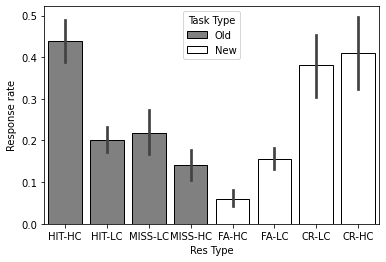

In [9]:
# Plot with error bar & differentiate the color by 'Task Type'

palette ={"Old": "gray", "New": "white"}
ax = sns.barplot(x="Res Type", y="Response rate", hue="Task Type", data=Bulk, palette = palette, dodge=False, edgecolor='k')


In [10]:
# source memory correct rate

In [82]:
# old_test, only for [Task_Type == 0]
old_test = [None]

for k in range(1,32):
    old_test.append(test_list[k][test_list[k]['Task_Type']==0])

In [83]:
# Add a column which indicates whether Res2 == LocID through 'correct' & 'incorrect'
# I'm aware the warning message would come out after this proecss due to the use of 'iloc' ,
# but kept going rather than using .copy() which is the solution for this warning cuz I mind the size of memory

for id in range(1,32):
    if id == 24 :
        None
    
    else:
        old_test[id]['SRC'] = ['correct' if int(old_test[id][old_test[id]['Object_ID'].isin([objid])].iloc[0][8]) == int(study_list[id][study_list[id]['ObjID'].isin([objid])].iloc[0][2]) else 'incorrect' for objid in old_test[id]['Object_ID']]

<ipython-input-83-26af1486a29b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_test[id]['SRC'] = ['correct' if int(old_test[id][old_test[id]['Object_ID'].isin([objid])].iloc[0][8]) == int(study_list[id][study_list[id]['ObjID'].isin([objid])].iloc[0][2]) else 'incorrect' for objid in old_test[id]['Object_ID']]


In [90]:
old_test[2]

,Trial,Object_ID,Task_Type,Stim_onset1,RT1,Res1,Stim_onset2,RT2,Res2,Res_Type,SRC
0,1,56,0,1005,3114,1,5855,1532,2,HIT-HC,incorrect
1,2,70,0,8520,1631,1,11888,1865,4,HIT-HC,incorrect
5,6,84,0,27470,981,4,30188,1066,5,MISS-HC,incorrect
8,9,22,0,41487,681,3,43905,749,5,MISS-LC,incorrect
9,10,99,0,45670,1765,2,49172,1415,5,HIT-LC,incorrect
...,...,...,...,...,...,...,...,...,...,...,...
516,517,81,0,2098384,764,2,2100885,782,4,HIT-LC,incorrect
517,518,153,0,2102800,397,1,2104935,665,4,HIT-HC,correct
522,523,35,0,2120634,864,1,2123235,749,2,HIT-HC,correct
524,525,82,0,2128634,463,2,2130835,682,2,HIT-LC,incorrect


In [89]:
total = old_test[id]['Res_Type'].value_counts()

In [ ]:
src = old_test[id][old_test[id]['SRC'].isin(['correct'])]['Res_Type'].value_counts()

In [91]:
OldnSrc = [None]

for id in range(1,32):
    if id == 24 :
        None
    
    else:
        total = old_test[id]['Res_Type'].value_counts()
        src = old_test[id][old_test[id]['SRC'].isin(['correct'])]['Res_Type'].value_counts()
        src_ratio = src / total
        ratio_df = pd.Series(src_ratio, name="Memory Scores").to_frame()
        ratio_df.index.name = 'Res Type'
        df = ratio_df.reset_index()
        OldnSrc.append(df.fillna(0))
        
display(OldnSrc[2])

,Res Type,Memory Scores
0,HIT-HC,0.447368
1,HIT-LC,0.311688
2,MISS-HC,0.000000
3,MISS-LC,0.000000


In [ ]:
''''old_test[3] = old_test[3][old_test[3]['SRC']=='correct']
df = old_test[id]['Res_Type'].value_counts(normalize=True)
X = pd.Series(df, name="Memory Scores").to_frame()
X.index.name = 'Res Type'
Z = X.reset_index()
OldnSrc.append(Z)''''

In [79]:
''''OldnSrc = []

for id in range(1,32):
    if id == 24 :
        None
    
    else:
        old_test[id] = old_test[id][old_test[id]['SRC']=='correct']
        df = old_test[id]['Res_Type'].value_counts(normalize=True)
        X = pd.Series(df, name="Memory Scores").to_frame()
        X.index.name = 'Res Type'
        Z = X.reset_index()
        OldnSrc.append(Z)
        
display(OldnSrc[1])
print(OldnSrc[19])''''

,Res Type,Memory Scores
0,HIT-HC,0.68
1,HIT-LC,0.32


  Res Type  Memory Scores
0   HIT-HC       0.626506
1  MISS-LC       0.180723
2   HIT-LC       0.120482
3  MISS-HC       0.072289


In [76]:
# Res Type and Memory Scores data of every subject against Old & SRC will be pasted on 'Bulk2'
Bulk2 = pd.concat(OldnSrc)
display(Bulk2)

,Res Type,Memory Scores
0,HIT-HC,0.807910
1,HIT-LC,0.216216
2,MISS-HC,0.000000
3,MISS-LC,0.107143
0,HIT-HC,0.447368
...,...,...
3,MISS-LC,0.000000
0,HIT-HC,0.434343
1,HIT-LC,0.029412
2,MISS-HC,0.011905


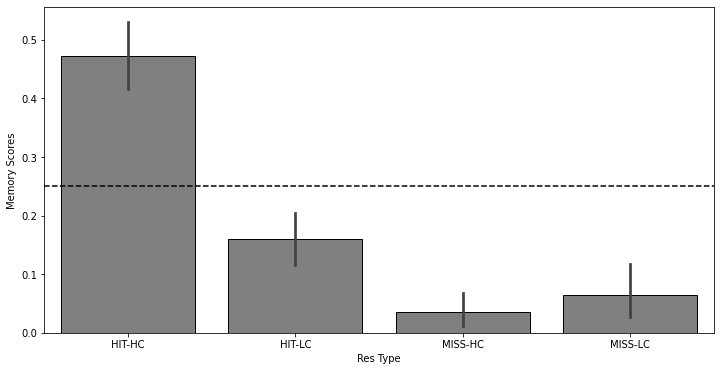

In [77]:
fig, ax1 = plt.subplots(figsize=(12,6))
bar = sns.barplot(x="Res Type", y="Memory Scores", data=Bulk2, color = 'gray', dodge=False, edgecolor='k', ax = ax1)
plt.axhline(y=0.25, ls='--', c='k')